# <span style='color:red'> Ultimate Guide to Normalization </span>

### <span style='color:blue'> <a href="https://x.com/abhishekdotai/status/1751233831296725443?s=20">Read About Normalisation in detail here.</a></span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_73366/265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
pd.read_csv('wine_data.csv')

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])

In [6]:
df.columns=['Class Label', 'Alcohol', 'Malic Acid']

In [7]:
df.sample(12)

,Class Label,Alcohol,Malic Acid
174,3,13.40,3.91
12,1,13.75,1.73
151,3,12.79,2.67
3,1,14.37,1.95
94,2,11.62,1.99
124,2,11.87,4.31
75,2,11.66,1.88
96,2,11.81,2.12
93,2,12.29,2.83
87,2,11.65,1.67


<Axes: xlabel='Alcohol', ylabel='Density'>

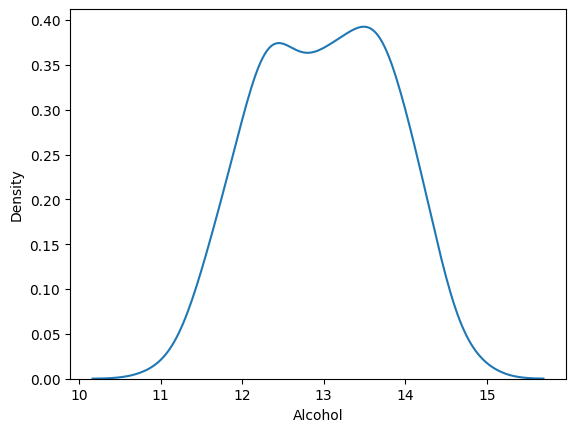

In [8]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

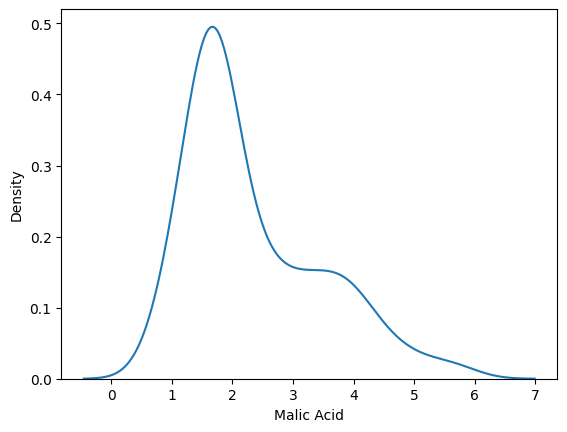

In [9]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

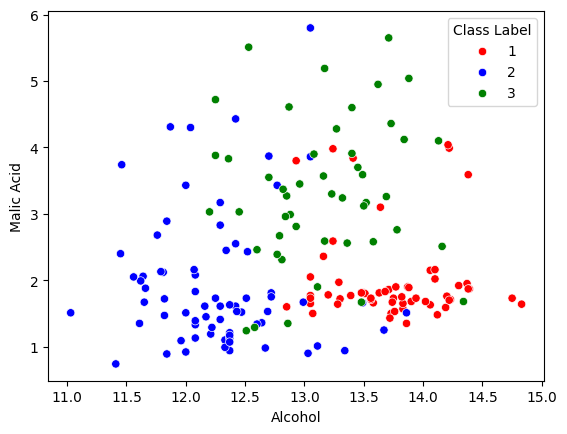

In [11]:
colors = { 1: 'red', 2: 'blue', 3: 'green'}

sns.scatterplot(data = df, x= 'Alcohol', y='Malic Acid', hue= 'Class Label', palette= colors)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class Label', axis=1), df['Class Label'], test_size = 0.3, random_state = 0)

In [13]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [14]:
from sklearn.preprocessing import MinMaxScaler

slr = MinMaxScaler()

In [15]:
slr.fit(X_train)

X_train_scaled = slr.transform(X_train)
X_test_scaled = slr.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame (X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame (X_test_scaled, columns= X_test.columns)

In [18]:
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [19]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


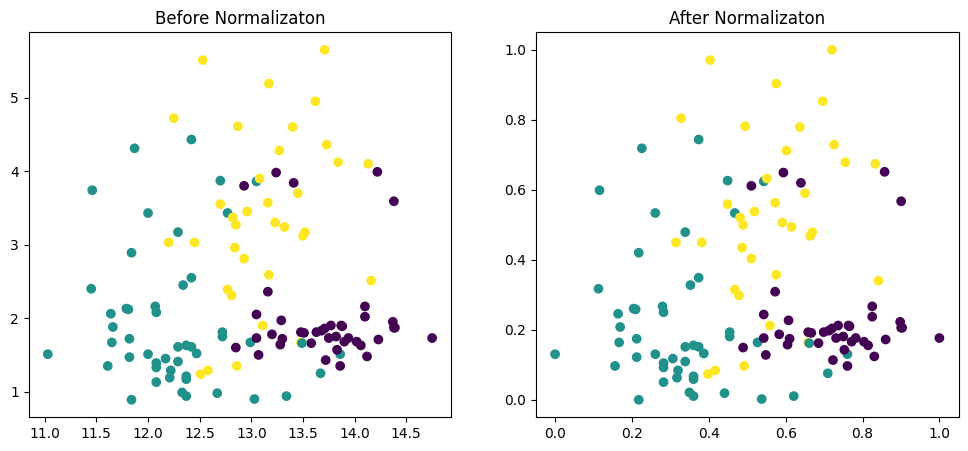

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize = (12, 5))
                               
ax1.set_title("Before Normalizaton")
ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c=y_train)

ax2.set_title("After Normalizaton")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c=y_train)

plt.show()

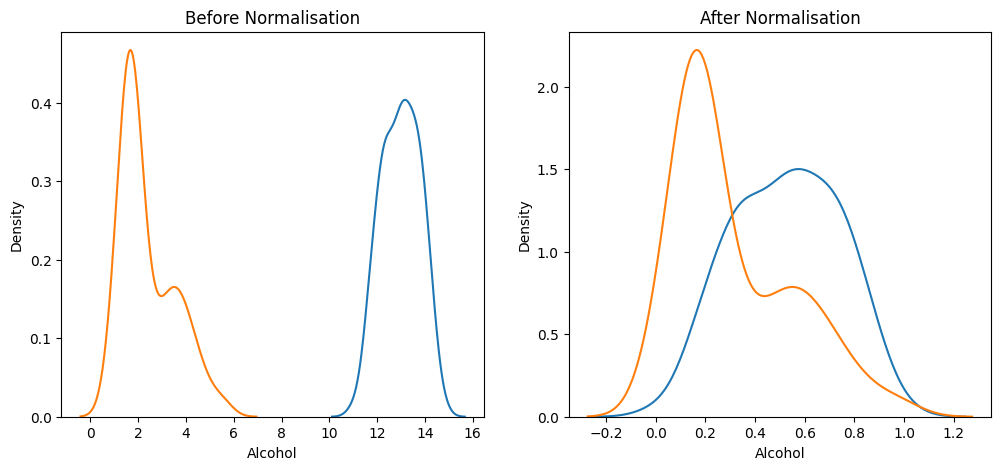

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Normalisation")
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Malic Acid'], ax = ax1)

ax2.set_title("After Normalisation")
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax = ax2)

plt.show()

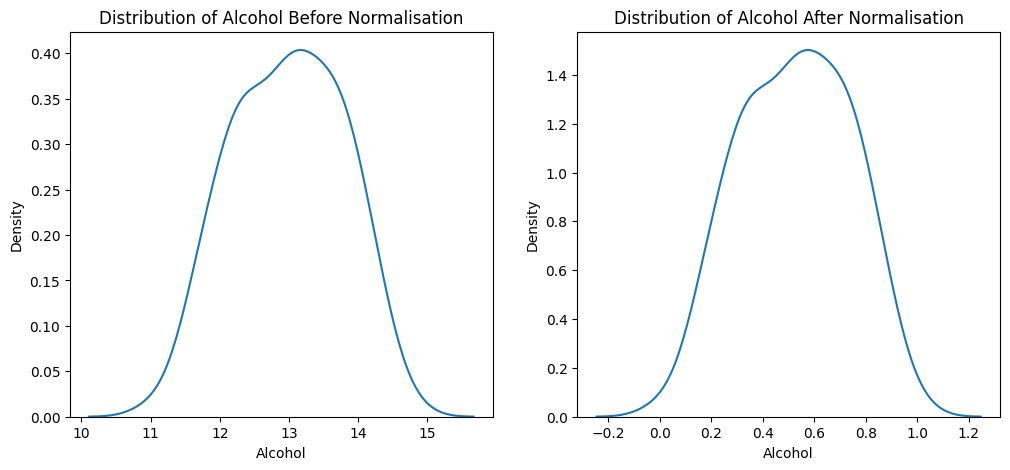

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Distribution of Alcohol Before Normalisation")
sns.kdeplot(X_train['Alcohol'], ax = ax1)

ax2.set_title("Distribution of Alcohol After Normalisation")
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)

plt.show()

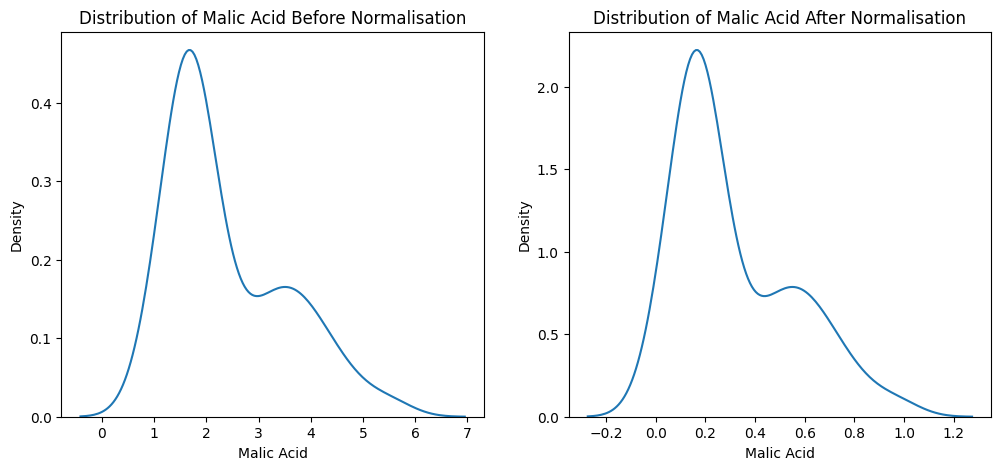

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Distribution of Malic Acid Before Normalisation")
sns.kdeplot(X_train['Malic Acid'], ax = ax1)

ax2.set_title("Distribution of Malic Acid After Normalisation")
sns.kdeplot(X_train_scaled['Malic Acid'], ax = ax2)

plt.show()